## 2. Visualization Exercise 2
In this task, two additional plots shall be added create a figure with multiple panels. Recreate the shown figure. Note, that the bottom part of the figure is one of your solutions from the first exercise. Two additional datasets are provided:

- 10_project_data_scatter.csv contains the data needed to create the shown scatter plot

- 10_project_data_barplot.csv contains the data needed to create the shown bar plot.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import numpy as np

In [12]:
# Load the dataframes
df1 = pd.read_csv("10_project_data_annotation.csv")
df2 = pd.read_csv("10_project_data_signals.csv")

In [13]:
# Read scatter plot data
sp = pd.read_csv("10_project_data_scatter.csv")

In [14]:
# Custom labels for bar plot x-axis
custom_labels = ['x->y', 'x->z', 'y->x', 'y->z']

In [15]:
# Read bar plot data
bp = pd.read_csv("10_project_data_barplot.csv")

In [16]:
# Extract data for bar plot

# Extract the labels for the x-axis from the DataFrame 'bp'
labels = bp['Unnamed: 0']

# Extract data for the first sample of condition A from the DataFrame 'bp'
condition_a_sample_1 = bp['condition_a_sample_1']

# Extract data for the second sample of condition A from the DataFrame 'bp'
condition_a_sample_2 = bp['condition_a_sample_2']

# Extract data for the control group from the DataFrame 'bp'
control = bp['control']

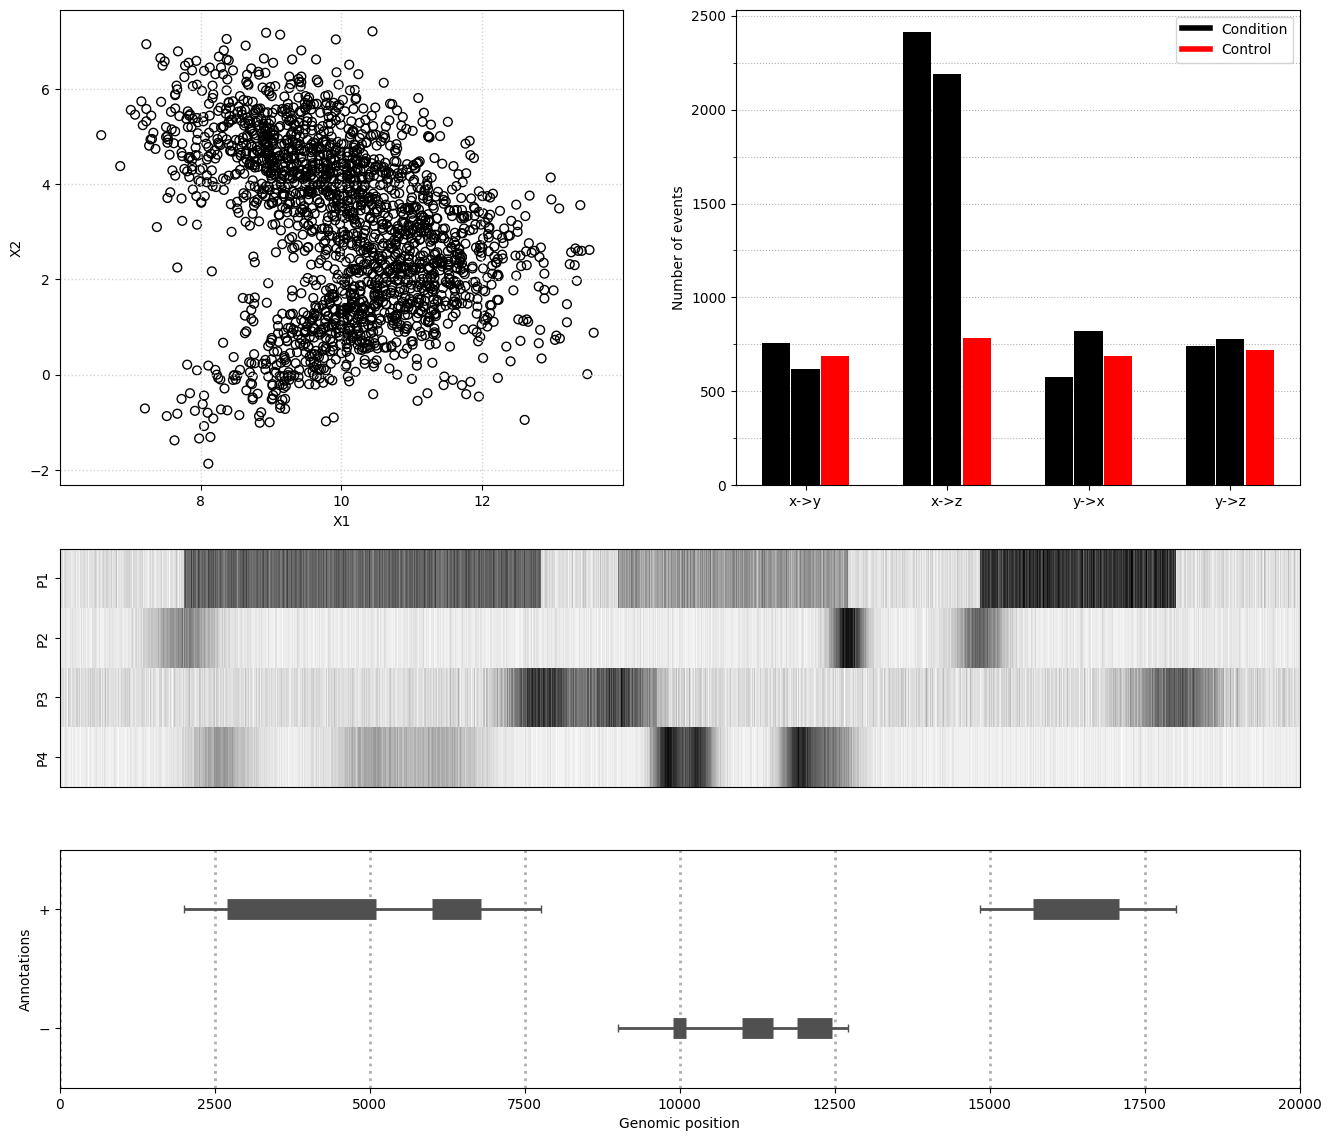

In [17]:
# Create the figure with a custom gridspec layout
fig = plt.figure(figsize=(16, 14))  # Create a new figure with a size of 16x14 inches
gs = fig.add_gridspec(3, 2, height_ratios=[2, 1, 1])  # Add a gridspec layout with 3 rows and 2 columns


# Scatter plot
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(x='x1', y='x2', data=sp, marker='o', color='none', s=40, edgecolors='black')
ax1.set_xlim(6, 14)  # Set x-axis limits from 6 to 14
xticks = np.arange(8, 14, 2)  # Start from 8 to exclude 6
ax1.set_xticks(xticks)  # Set the x-axis ticks
ax1.set_xticklabels(xticks)  # Set x-axis tick labels to match the ticks
ax1.grid(True, linestyle='dotted', color='lightgrey', linewidth=1)
#set the axis labels
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')




# Bar plot
ax2 = fig.add_subplot(gs[0, 1])  # Add a subplot in the first row, second column
x = np.arange(len(labels))  # Define the x-axis locations for the bars
width = 0.2  # Set the width of each bar
spacing = 0.02  # Define spacing between groups of bars

# Plot bars for Condition A Sample 1
rects1 = ax2.bar(x - (width + spacing / 2), condition_a_sample_1, width,
                 label='Condition A Sample 1', color='black', zorder=3)
# Plot bars for Condition A Sample 2
rects2 = ax2.bar(x, condition_a_sample_2, width, label='Condition A Sample 2',
                 color='black', zorder=3)
# Plot bars for Control
rects3 = ax2.bar(x + (width + spacing / 2), control, width, label='Control',
                 color='red', zorder=3)

ax2.set_yticks(np.arange(0, 2725, 500))  # Set y-axis major ticks
ax2.set_yticks(np.arange(0, 2725, 250), minor=True)  # Set y-axis minor ticks
ax2.yaxis.grid(True, which='major', zorder=0, linestyle='dotted')  # Add grid lines for major y-axis ticks
ax2.yaxis.grid(True, which='minor', linestyle='dotted')  # Add grid lines for minor y-axis ticks
ax2.set_ylabel('Number of events')  # Label y-axis as 'Number of events'
ax2.set_xticks(x)  # Set x-axis ticks
ax2.set_xticklabels(custom_labels)  # Set x-axis tick labels to 'custom_labels'

# Add legend for bar plot
condition_patch = plt.Line2D([0], [0], color='black', lw=4, label='Condition')  # Create a legend patch for Condition
control_patch = plt.Line2D([0], [0], color='red', lw=4, label='Control')  # Create a legend patch for Control
ax2.legend(handles=[condition_patch, control_patch])  # Add the legend to the bar plot




# Heatmap
ax3 = fig.add_subplot(gs[1, :])  # Add a subplot in the second row, spanning both columns
data = np.vstack([df2['P1'], df2['P2'], df2['P3'], df2['P4']])  # Stack data arrays vertically for the heatmap
sns.heatmap(data, cmap='Greys', cbar=False, yticklabels=['P1', 'P2', 'P3', 'P4'], ax=ax3)  # Create a heatmap with specified properties
ax3.xaxis.grid(True)  # Add grid lines to the x-axis
ax3.set_xticks([])  # Hide x-axis ticks
ax3.set_xlim([0, 20000])  # Set x-axis limits
# Add solid outline for heatmap
ax3.spines['top'].set_visible(True)
ax3.spines['right'].set_visible(True)
ax3.spines['left'].set_visible(True)
ax3.spines['bottom'].set_visible(True)



# Annotations
ax4 = fig.add_subplot(gs[2, :])  # Add a subplot in the third row, spanning both columns
ax4.set_xlim([0, 20000])  # Set x-axis limits
ax4.set_xlabel('Genomic position', fontsize=10)  # Label x-axis as 'Genomic position'
ax4.set_ylabel('Annotations', fontsize=10)  # Label y-axis as 'Annotations'
ax4.set_ylim(-0.5, 1.5)  # Set y-axis limits
ax4.set_yticks([0, 1])  # Set y-axis ticks
ax4.set_yticklabels(['−', '+'])  # Label y-axis ticks
ax4.xaxis.grid(True, linestyle='dotted', linewidth = 2)  # Add dotted grid lines to the x-axis

# Plot annotations
for _, r in df1.iterrows():  # Iterate over rows of DataFrame 'df1'
    marker = '|'
    markersize = 10  # Marker size
    lw = 2
    if r['type'] == 'exon':  # If type is 'exon'
        marker = None
        lw = 15
    y = 1 if r['strand'] == '+' else 0  # Set y-coordinate based on strand
    ax4.plot((r['start'], r['stop']), (y, y),  # Plot line for the annotation
             marker=marker, lw=lw,  # Set marker and line width
             solid_capstyle='butt',  # Set line cap style
             color='#505050')  # Set line color


plt.show()  # Display the figure